<a href="https://colab.research.google.com/github/Induvardhan116/Generative-AI/blob/main/gen_final_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
df = pd.read_csv("/content/diabetes_prediction_dataset.csv")
print(df)


       gender   age  hypertension  heart_disease smoking_history    bmi  \
0      Female  80.0             0              1           never  25.19   
1      Female  54.0             0              0         No Info  27.32   
2        Male  28.0             0              0           never  27.32   
3      Female  36.0             0              0         current  23.45   
4        Male  76.0             1              1         current  20.14   
...       ...   ...           ...            ...             ...    ...   
99995  Female  80.0             0              0         No Info  27.32   
99996  Female   2.0             0              0         No Info  17.37   
99997    Male  66.0             0              0          former  27.83   
99998  Female  24.0             0              0           never  35.42   
99999  Female  57.0             0              0         current  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0              6.6                  140        

In [13]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


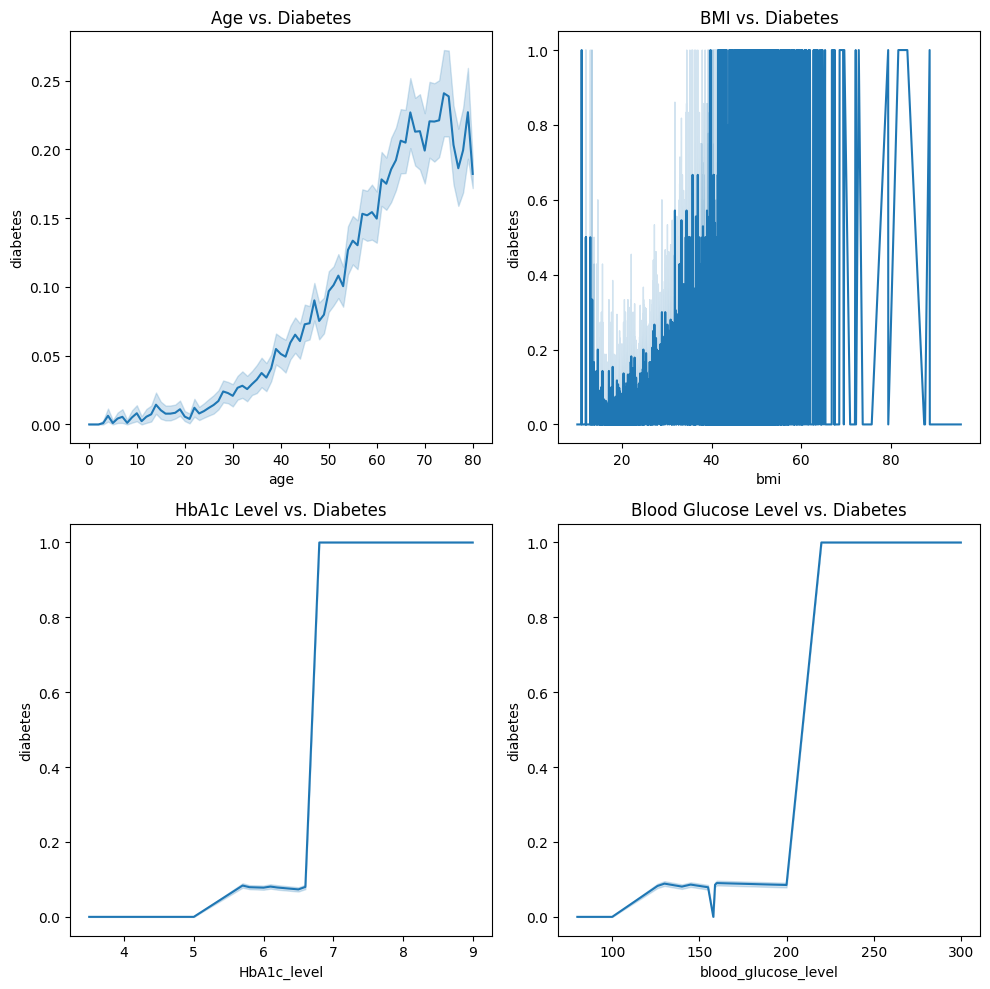

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Plot Age vs. Diabetes (Line Graph)
sns.lineplot(x='age', y='diabetes', data=df, ax=axs[0, 0])
axs[0, 0].set_title("Age vs. Diabetes")

# Plot BMI vs. Diabetes (Line Graph)
sns.lineplot(x='bmi', y='diabetes', data=df, ax=axs[0, 1])
axs[0, 1].set_title("BMI vs. Diabetes")

# Plot HbA1c Level vs. Diabetes (Line Graph)
sns.lineplot(x='HbA1c_level', y='diabetes', data=df, ax=axs[1, 0])
axs[1, 0].set_title("HbA1c Level vs. Diabetes")

# Plot Blood Glucose Level vs. Diabetes (Line Graph)
sns.lineplot(x='blood_glucose_level', y='diabetes', data=df, ax=axs[1, 1])
axs[1, 1].set_title("Blood Glucose Level vs. Diabetes")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [18]:
print(f"Smoking History Unique Values: {df['smoking_history'].unique()}")
print(f"Genders: {df['gender'].unique()}")

Smoking History Unique Values: ['never' 'No Info' 'current' 'former' 'ever' 'not current']
Genders: ['Female' 'Male' 'Other']


In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['smoking_history']= le.fit_transform(df['smoking_history'])
df['gender']= le.fit_transform(df['gender'])

df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,4,35.42,4.0,100,0


<Axes: >

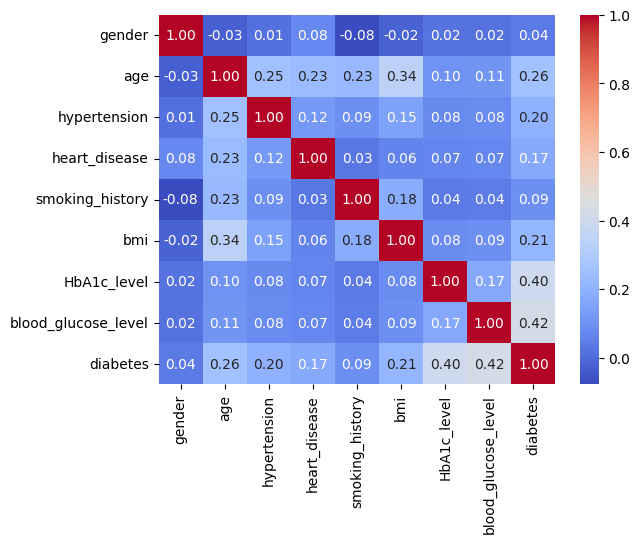

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

correlations = df.corr()

sns.heatmap(correlations, annot=True, fmt = '.2f', cmap='coolwarm')


In [40]:
features = correlations["diabetes"][:-1].sort_values(ascending=False)
features

,diabetes
blood_glucose_level,0.419558
HbA1c_level,0.400660
age,0.258008
bmi,0.214357
hypertension,0.197823
heart_disease,0.171727
smoking_history,0.094290
gender,0.037411


In [41]:
indices = np.array([df.columns.get_loc(col) for col in features.index])
indices

array([7, 6, 1, 5, 2, 3, 4, 0])

In [25]:
X = df.drop('diabetes',axis=1)
Y = df['diabetes']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

print(f"Training Samples:\t{len(X_train)}")
print(f"Testing Samples:\t{len(X_test)}")

Training Samples:	80000
Testing Samples:	20000


In [26]:
print(f"Null Hypothesis Baseline: {(Y_test == 0).sum() / Y_test.count() * 100}%")


Null Hypothesis Baseline: 91.595%


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# ... (your existing code for X_train, Y_train, indices)

X_t, X_v, Y_t, Y_v = train_test_split(X_train, Y_train, test_size=0.1)

scaler = StandardScaler()
X_t = scaler.fit_transform(X_t)
X_v = scaler.transform(X_v)

# Limit indices to the number of columns in X_t and X_v
num_features_to_use = X_t.shape[1]
indices_to_use = indices[indices < num_features_to_use]

accuracies = [
    float(f"{(Y_pred == Y_v).sum() / Y_test.count():.5f}")
    for i in range(len(indices_to_use))
    for logisticModel in [LogisticRegression()]
    for Y_pred in [logisticModel.fit(X_t[:, indices_to_use[: i + 1]], Y_t).predict(X_v[:, indices_to_use[: i + 1]])]  # Fit and predict using limited indices
]

print(accuracies)

[0.37605, 0.37705, 0.3782, 0.37805, 0.3839]


In [44]:
# Instead, proceed directly to scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
logisticModel = LogisticRegression()
logisticModel.fit(X_train, Y_train)
Y_pred = logisticModel.predict(X_test)

accuracy = (Y_pred == Y_test).sum() / Y_test.count()
print(f"Accuracy: {accuracy * 100}%")

Accuracy: 95.985%


In [ ]:
https://www.kaggle.com/code/sushant24/notebook2ff777d886

In [47]:
https://www.kaggle.com/code/mustafafarajallah/diabetes-ann-tuning

SyntaxError: invalid syntax (<ipython-input-47-545e2d4abff8>, line 1)

In [48]:
https://www.kaggle.com/code/spooktober/machine-learning-nn

SyntaxError: invalid syntax (<ipython-input-48-5567c99585b6>, line 1)